# Das Richtungsfeld

Gegeben 
\begin{equation}
\frac{d\mathbf{y}(t)}{dt} = \mathbf{f}(\mathbf{y}(t),t)
\end{equation}

Wir interpretieren die rechte Seite dieser Gleichung als den Richtungvektor der zeitlichen Veränderung von $\mathbf{y}$.

Von nun an schreiben wir für $\frac{d\mathbf{y}(t)}{dt} = \dot{y}$

In [1]:
# Zuerst benötigen wir die Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Exponentielles Wachstum oder Zerfall
$\dot{y}(t) +\alpha y(t)=f(y,t)$. Zunächst setzen wir $\alpha=1$ und $f(y,t)=0$, dann mit $f(y,t)=3$, $f(y,t)=0.5*t$, $f(y,t)=sin(t)$


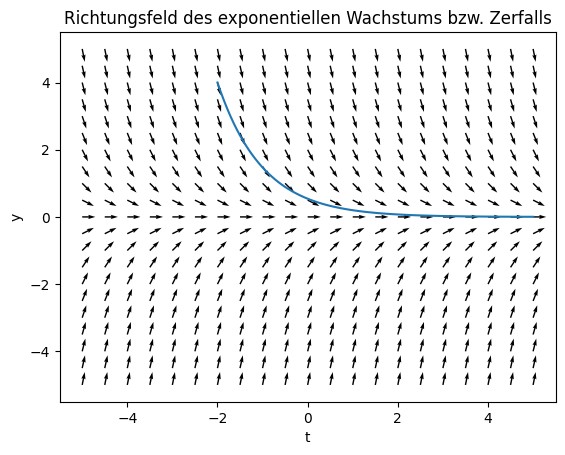

In [2]:
# Intervall in t und y mit linear spacing
n = 21
t = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
# hier kann die Inhomogenität f geändert werden
def f(t):
#    return np.sin(t)+1
#    return 0.5*t
    return 0
#
def dydt(t,y):
    return -y+f(t)
# Das meshgrid für den Graphen
T, Y = np.meshgrid(t,y) 
# Die Komponenten des tangentialen Einheitsbvektors
DT = np.ones((n,n))
DY = dydt(T,Y)
# Normierung der Tangentialvektoren
DTDYNorm = np.sqrt(DT**2+DY**2)
#DTDYNorm[n//2,n//2] = 1.
DT = DT/DTDYNorm
DY = DY/DTDYNorm
# Graph erzeugen
fig, ax = plt.subplots()
# Achsenbeschriftung, Titel
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Richtungsfeld des exponentiellen Wachstums bzw. Zerfalls')
#
ax.quiver(T,Y,DT,DY)
#
t_span = [-2., 5.]
t_eval = np.linspace(-2.,5.,100)
y0 = [4.]
sol = solve_ivp(dydt, t_span, y0, t_eval= t_eval)
ax.plot(sol.t,sol.y[0])
#
fig.savefig('Exponentiell.png')

## Richtungsfeld im Phasenraum des Harmonischen Oszillators

Im Falle des harmonische Oszillators liegt die Diffeentialgleichung
$$\ddot{y}(t)+\alpha\cdot\dot{y}(t)+\omega^2\cdot y(t)=f(t)$$
vor. Wir schreiben dies als System von zwei gekoppelten Differentialgleichungen erster Ordnung
\begin{align}
\dot{y}_1(t)&=y_2(t)\\
\dot{y}_2(t)&=-y_1(t)+f(t)
\end{align}
Die Lösung dieses systems unter verschiedenen Anfangsbedingungen $y_1(0)=y_0$, $y_2(0)=v_0$ und mit verschiedenen $\alpha$ und $f(t)$ zeichnen wir als Phasenraumplot $y_2$ über $y_1$.

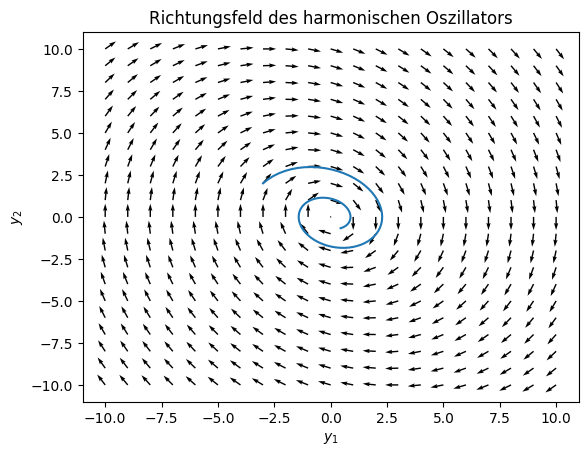

In [6]:
# Intervall in t und y mit linear spacing
n = 21
y1 = np.linspace(-10,10,n)
y2 = np.linspace(-10,10,n)
# hier kann die Inhomogenität f geändert werden
def f(t):
#    return np.sin(2.3*t)
#    return 0.5*t
#    return 3.
    return 0.
# 
def dydt(t,r):
    y1, y2 = r
    a = .3     # Die Dämpfungskonstante is a
    dy1dt = y2
    dy2dt = -y1-a*y2+f(t)
    return [dy1dt,dy2dt]
# Das meshgrid für den Graphen
Y1, Y2 = np.meshgrid(y1,y2) 
# Die Komponenten des normierten tangentialen Einheitsbvektors
DY1, DY2 = dydt(1., [Y1, Y2])
DY1DY2Norm = np.sqrt(DY1**2+DY2**2)
IndexNormZero = np.argwhere(DY1DY2Norm<1.e-12)
if bool(IndexNormZero.size): DY1DY2Norm[IndexNormZero[0][0],IndexNormZero[0][1]] = 1.
DY1 = DY1/DY1DY2Norm
DY2 = DY2/DY1DY2Norm
# Graph erzeugen
fig, ax = plt.subplots()
# Achsenbeschriftung, Titel
ax.set_xlabel(r'$y_1$')
ax.set_ylabel(r'$y_2$')
ax.set_title('Richtungsfeld des harmonischen Oszillators')
#
ax.quiver(Y1,Y2,DY1,DY2)
#
t_span = [0., 10.]
t_eval = np.linspace(0,10.,100)
y0 = [-3.,2.]
sol = solve_ivp(dydt, t_span, y0, t_eval= t_eval)
ax.plot(sol.y[0],sol.y[1])
#
fig.savefig('HO.png')

## Zeichnen Sie in obiger Abbildung zwei weitere Graphiken $y_1(t)$ und $y_2(t)$!